In [31]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt



In [2]:
im = cv2.imread('pelak/1/1 (1).jpg')

In [3]:
cv2.imshow('photo',im)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
im = cv2.imread('pelak/2/2 (1).jpg')

In [5]:
files = os.listdir('pelak/1')

In [6]:
im2 = cv2.resize(im,(8,32))

In [7]:
im3 = cv2.cvtColor(im2 , cv2.COLOR_BGR2GRAY)

In [8]:
im3.shape

(32, 8)

In [9]:
im4 = im3.flatten()

In [10]:
im5 = im4.reshape(32,8)

In [11]:
files = os.listdir('pelak/1')
x = np.empty((0,256))
y = np.array([])
for filename in files:
    im = cv2.imread('pelak/1/' + filename)
    im2 = cv2.resize(im,(8,32))
    im3 = cv2.cvtColor(im2 , cv2.COLOR_BGR2GRAY)
    im4 = im3.flatten()
    x = np.append(x,[im4], axis=0)
    y = np.append(y,1)

In [12]:
files = os.listdir('pelak/2')

for filename in files:
    im = cv2.imread('pelak/2/' + filename)
    im2 = cv2.resize(im,(8,32))
    im3 = cv2.cvtColor(im2 , cv2.COLOR_BGR2GRAY)
    im4 = im3.flatten()
    x = np.append(x,[im4], axis=0)
    y = np.append(y,2)

In [13]:
y[700]

2.0

In [14]:
from sklearn  import linear_model
from sklearn.model_selection import train_test_split

In [15]:
X_train ,X_test ,y_train , y_test =train_test_split(x ,y ,test_size = 0.2)


In [16]:
model = linear_model.LogisticRegression()

In [17]:

model.fit(X_train,y_train)

C:\Users\p\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
out = model.predict(X_test)

In [19]:
x1 = np.empty((0,256))
im = cv2.imread('pelak/1/1 (154).jpg' )
im2 = cv2.resize(im,(8,32))
im3 = cv2.cvtColor(im2 , cv2.COLOR_BGR2GRAY)
im4 = im3.flatten()
x1 = np.append(x1,[im4], axis=0)


In [20]:
natije = model.predict(x1)

In [21]:
natije

array([1.])

In [22]:
img_plak = cv2.imread('pelak.png')

In [25]:
img_plak0 = cv2.imread('pelak.png',0)

In [26]:
cv2.imshow('photo',img_plak0)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
s = np.sum(img_plak0 , axis=0,keepdims=True)

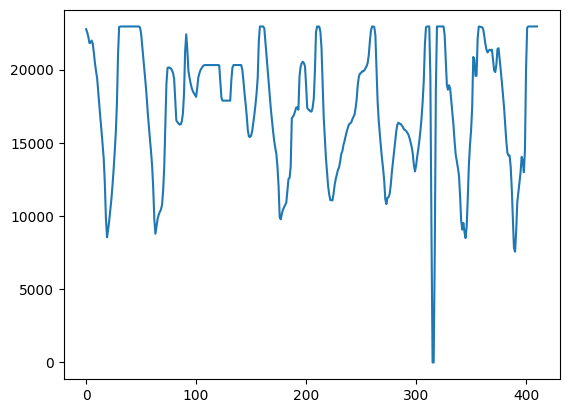

In [33]:
plt.close()
plt.plot(s[0])
plt.show()